# 📌 Salary Prediction - Regression

## 🔹 TODO: Data Analyzing
- [x] **Loading data**
- [x] Thinking about the data  
- [x] Keep only the most important columns (analyzing relationships between features and label)  
- [X] Check for missing values, data types, and unique values  
- [X] Data Plotting 


---

## 🔹 TODO: Data Preprocessing
- [X] **Handling missing data** 
- [X] **Boxplot, scale, and remove outliers** (numerical data)  
  **⚠️ REMEMBER:** Always use `.unique()` to check unique values  
- [X] **Label Encoding** (categorical data)  `sklearn.preprocessing.LabelEncoder`  
- [ ] **Store dictionary for label decoding**  
- [X] **Standard Scaller**  
- [X] **Separate features and label**  
- [X] **Train-test split**  

---

## 🔹 TODO: Model Training & Testing
- [X] Load models from libraries using **Pipeline**  
- [X] **Hyperparameter tuning**  
  - Use **GridSearchCV, RandomizedSearchCV, and Cross-validation** to find the best model  
- [X] **Fit model to training data**  
- [X] **Test model on test dataset**  

---

## 🔹 TODO: Evaluate Models
- [X] **Calculate performance metrics:**  
  - **MAE** (Mean Absolute Error)  
  - **MSE** (Mean Squared Error)  
  - **RMSE** (Root Mean Squared Error)  
  - **R² Score** and **Adjusted R² Score**  

---

## 🔹 TODO: Saving Model with Pickle
- [ ] Save trained model using **Pickle**  
- [ ] Save **scaler** and **label encoder dictionary** for future use  

✅ **Workflow completed! 🚀**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.iloc[[14278]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14278,-117.12,32.71,33.0,1256.0,331.0,1315.0,321.0,1.9286,78500.0,NEAR OCEAN


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Dataset Features Description

1. **longitude**: A measure of how far west a house is; a higher value is farther west.  
2. **latitude**: A measure of how far north a house is; a higher value is farther north.  
3. **housingMedianAge**: Median age of a house within a block; a lower number indicates a newer building.  
4. **totalRooms**: Total number of rooms within a block.  
5. **totalBedrooms**: Total number of bedrooms within a block.  
6. **population**: Total number of people residing within a block.  
7. **households**: Total number of households, a group of people residing within a home unit, for a block.  
8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars).  
9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars).  
10. **oceanProximity**: Location of the house with respect to the ocean/sea.  

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
for col in df:
    print(f'-> {col}: {df[col].unique()}\n\n')

-> longitude: [-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.43 -120.42 

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Tạo các đặc trưng mới
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


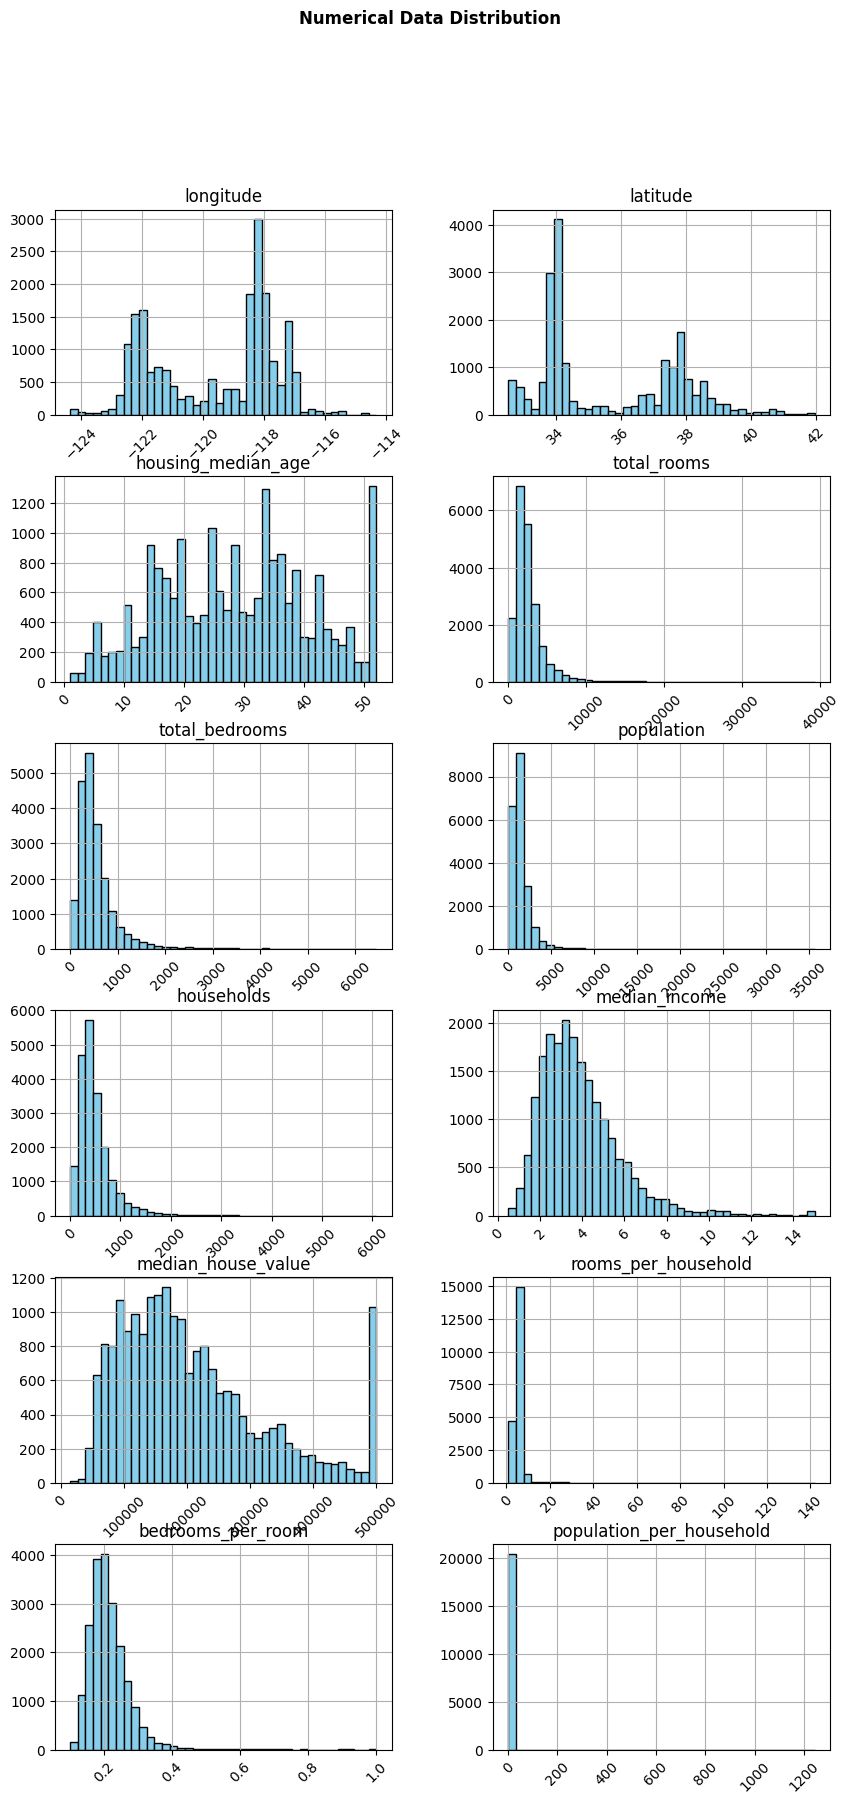

In [10]:
### Histogram for numberical columns
axes = df.hist(layout=(int(len(df.columns)/2), 2), figsize=(10, 20), 
               bins=40, edgecolor='black', color='skyblue', grid=True)

plt.suptitle("Numerical Data Distribution", fontweight='bold')

for ax in axes.flatten():
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # Xoay 45 độ (có thể thay đổi)

plt.show()

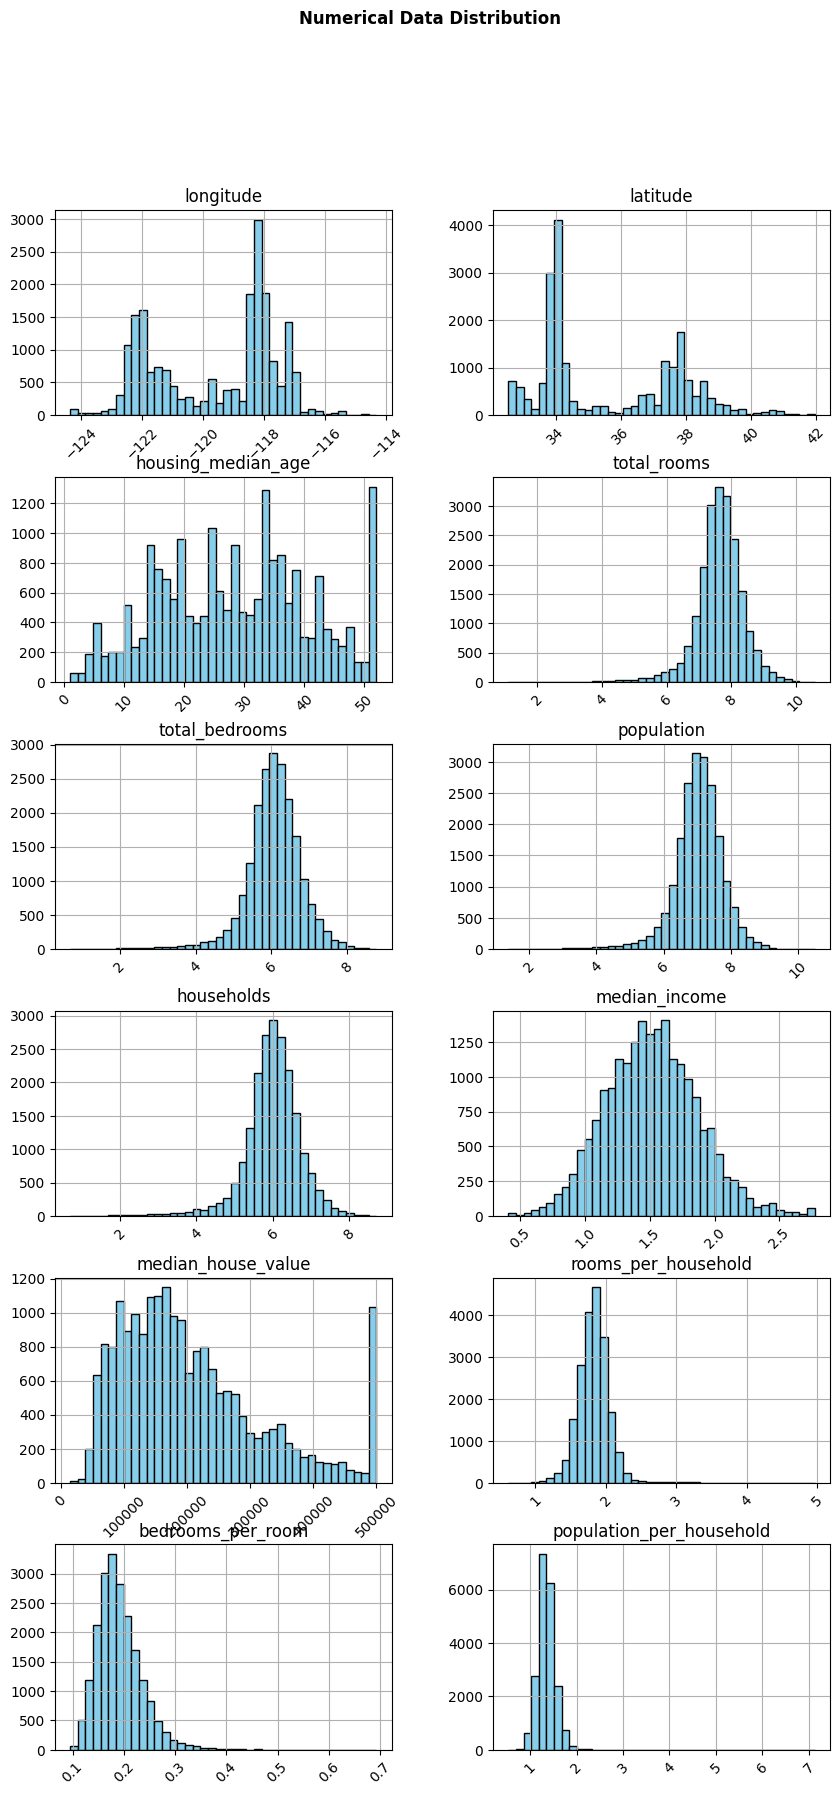

In [11]:
# Phân phối lệch phải (right-skewed) với một số giá trị ngoại lai lớn
df['total_rooms'] = np.log1p(df['total_rooms'])
df['total_bedrooms'] = np.log1p(df['total_bedrooms'])
df['population'] = np.log1p(df['population'])
df['households'] = np.log1p(df['households'])
df['median_income'] = np.log1p(df['median_income'])
df['rooms_per_household'] = np.log1p(df['rooms_per_household'])
df['bedrooms_per_room'] = np.log1p(df['bedrooms_per_room'])
df['population_per_household'] = np.log1p(df['population_per_household'])


### Histogram again for numberical columns
axes = df.hist(layout=(int(len(df.columns)/2), 2), figsize=(10, 20), 
               bins=40, edgecolor='black', color='skyblue', grid=True)

plt.suptitle("Numerical Data Distribution", fontweight='bold')

for ax in axes.flatten():
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # Xoay 45 độ (có thể thay đổi)

plt.show()

/var/folders/9t/8gt94v713xndp2sf90nj01b00000gn/T/ipykernel_96997/3806867838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['ocean_proximity'], palette="Set2")


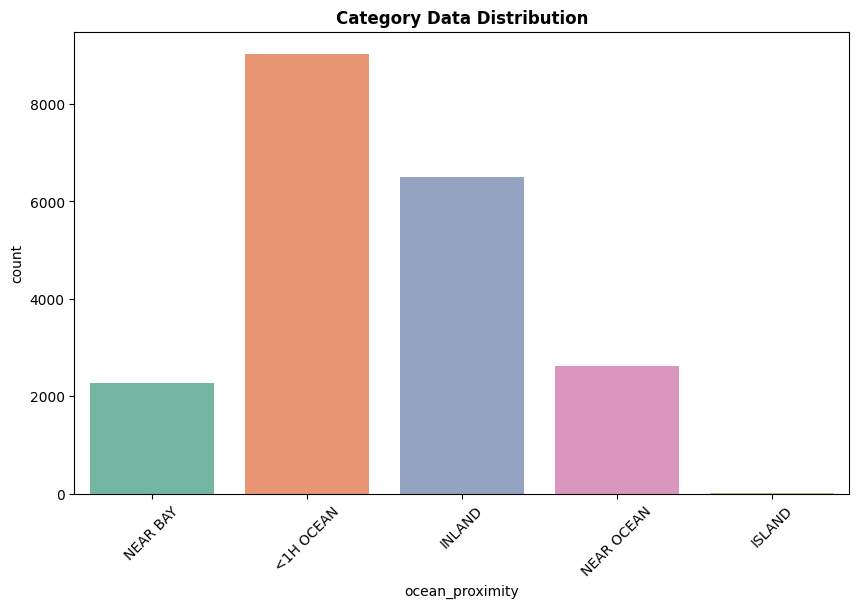

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['ocean_proximity'], palette="Set2")
plt.xticks(rotation=45)  # Xoay nhãn nếu cần
plt.title("Category Data Distribution", fontweight='bold')
plt.show()

<Axes: >

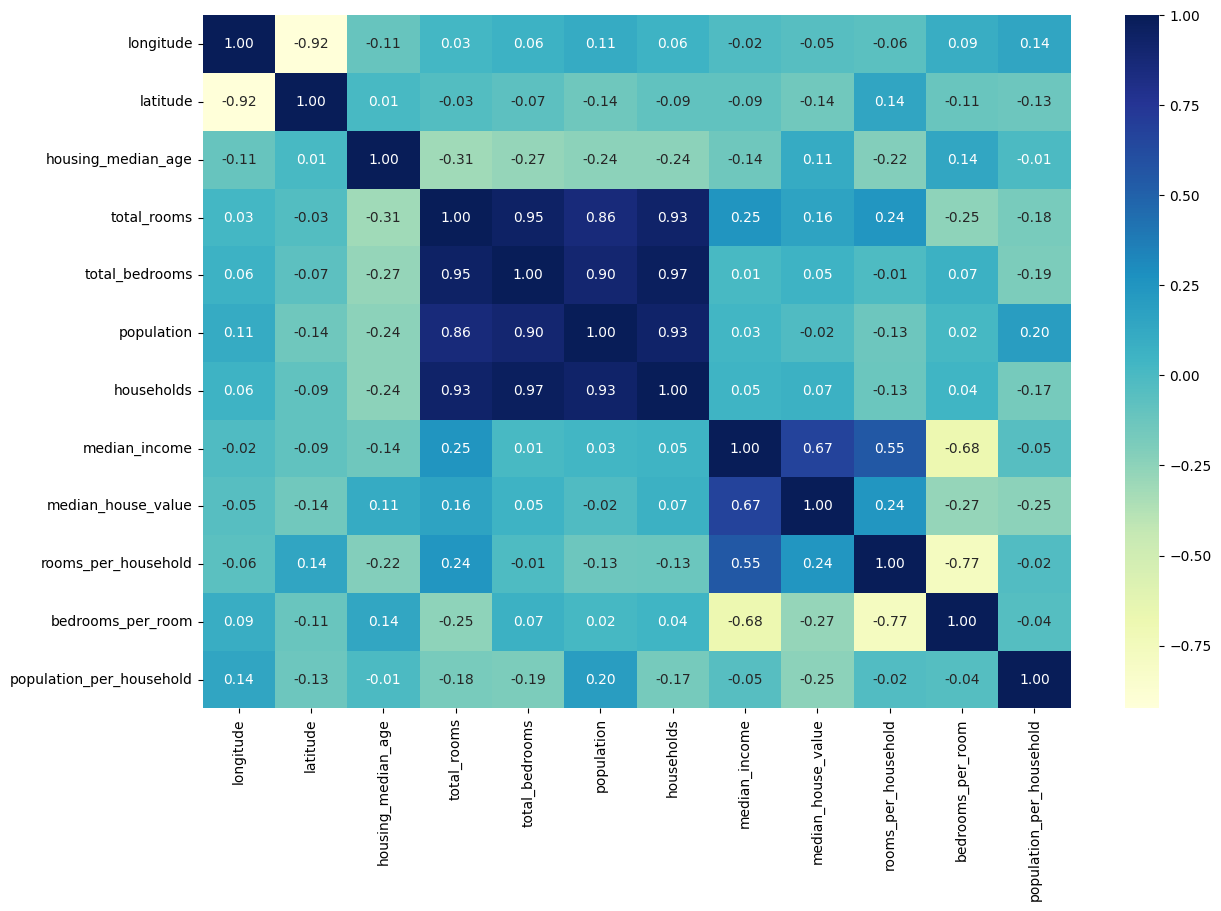

In [13]:
plt.figure(figsize=(14, 9))
sns.heatmap(data=df.select_dtypes(include=['number']).corr(), annot=True, cmap='YlGnBu', fmt=".2f")

# 📊 Nhận xét về Heatmap

## 1. Mối quan hệ giữa kinh độ (`longitude`) và vĩ độ (`latitude`)
- Hệ số tương quan rất cao (**-0.92**), thể hiện mối quan hệ nghịch mạnh.  
- Nhin vi trí địa lí của california

## 2. Số phòng (`total_rooms`), số phòng ngủ (`total_bedrooms`), dân số (`population`) và số hộ (`households`)
- Các biến này có hệ số tương quan cao (**>0.85**), nghĩa là khu vực có nhiều hộ dân thì số phòng cũng tăng lên.

## 3. Thu nhập trung bình (`median_income`) và giá trị nhà (`median_house_value`)
- Hệ số tương quan **0.69**, cao nhất so với các biến khác.  
- Điều này cho thấy thu nhập càng cao thì giá nhà càng cao.

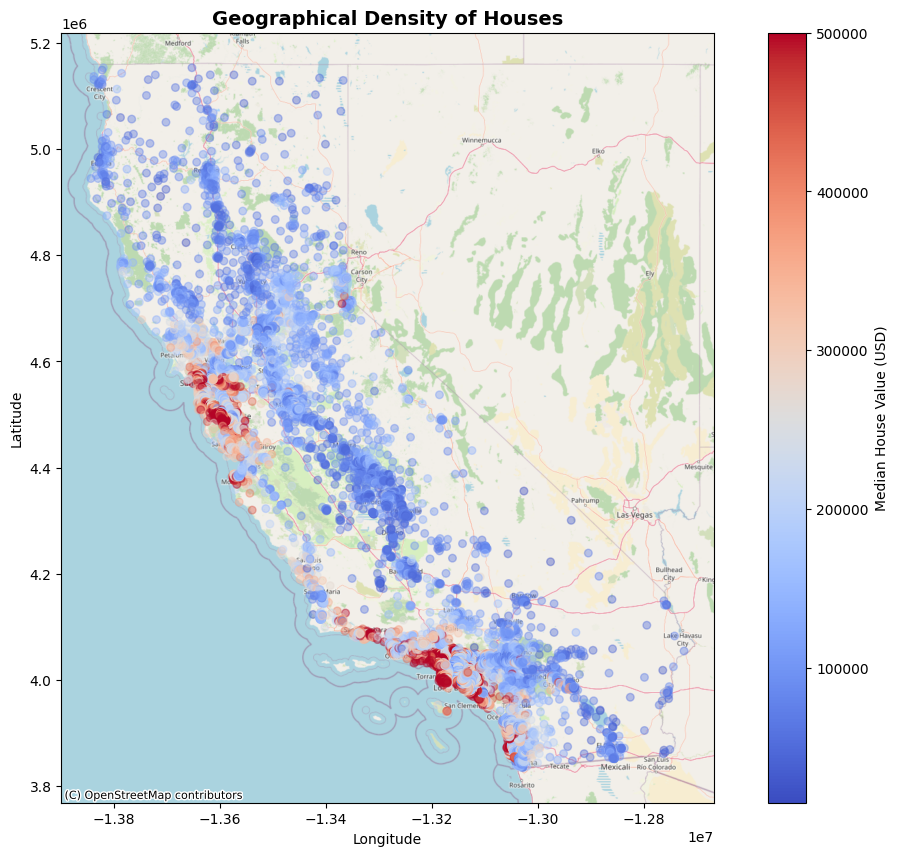

In [14]:
import geopandas as gpd
import contextily as ctx

# Tạo GeoDataFrame từ DataFrame gốc
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.longitude, df.latitude), 
                       crs="EPSG:4326")  # Hệ tọa độ địa lý WGS84

# Chuyển sang hệ tọa độ Web Mercator (EPSG:3857) để hiển thị với bản đồ
gdf = gdf.to_crs(epsg=3857)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(14, 10))
gdf.plot(
    ax=ax, 
    column="median_house_value",  
    cmap="coolwarm", 
    markersize=30, 
    alpha=0.4, 
    legend=True,
    legend_kwds={
        "label": "Median House Value (USD)",
    } 
)

# Thêm bản đồ nền từ OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Thiết lập nhãn và tiêu đề
ax.set_title("Geographical Density of Houses", fontsize=14, fontweight="bold")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# Training Models

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Phân chia cột số và cột phân loại
num_features = ["longitude", "latitude", "housing_median_age", "total_rooms", 
                "total_bedrooms", "population", "households", "median_income",
                "rooms_per_household", "bedrooms_per_room", "population_per_household"]

cat_features = ["ocean_proximity"]

# Tiền xử lý: Scale dữ liệu số, OneHotEncode dữ liệu phân loại
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])

# Load dữ liệu
X = df.drop(columns='median_house_value')
y = df['median_house_value']

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================
# 🔥 Pipeline chung cho tất cả mô hình
# =======================
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())  # Placeholder, sẽ thay đổi trong GridSearchCV
])

# =======================
# 🏆 GridSearchCV - Linear Regression
# =======================
lr_param_grid = {
    'model': [LinearRegression()],
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False]
}

lr_grid_search = GridSearchCV(
    pipeline, param_grid=lr_param_grid, cv=20, scoring='r2', n_jobs=-1
)
lr_grid_search.fit(X_train, y_train)

# =======================
# 🌲 GridSearchCV - Random Forest
# =======================
rf_param_dist = {
    'model': [RandomForestRegressor(random_state=42)],
    'model__n_estimators': np.arange(100, 500, 50),
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(
    pipeline, param_distributions=rf_param_dist, n_iter=30, cv=5, scoring='r2', random_state=42, n_jobs=-1
)
rf_random_search.fit(X_train, y_train)

# =======================
# 🚀 RandomizedSearchCV - XGBoost
# =======================
xgb_param_dist = {
    'model': [XGBRegressor(random_state=42, n_jobs=-1)],
    'model__n_estimators': np.arange(1000, 1500, 100), 
    'model__max_depth': np.arange(2, 5, 1),
    'model__learning_rate': np.linspace(0.0005, 0.005, 10),
    'model__subsample': [0.5, 0.7, 0.9],
    'model__colsample_bytree': [0.5, 0.7, 0.9],
    'model__reg_alpha': [0.1, 1, 10, 100],  # L1 regularization
    'model__reg_lambda': [1, 10, 100],  # L2 regularization
    'model__min_child_weight': [5, 10, 20]
}

xgb_random_search = RandomizedSearchCV(
    pipeline, param_distributions=xgb_param_dist, n_iter=30, cv=20, scoring='r2', random_state=42, n_jobs=-1
)
xgb_random_search.fit(X_train, y_train)

# =======================
# 📊 Đánh giá mô hình
# =======================
models = {
    "Linear Regression": lr_grid_search.best_estimator_,
    "Random Forest": rf_random_search.best_estimator_,
    "XGBoost": xgb_random_search.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  MSE  = {mse:.2f}")
    print(f"  MAE  = {mae:.2f}")
    print(f"  R²   = {r2:.4f}")
    print("-" * 30)

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
    }
    print(f"Model: {model.named_steps['model']}")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")
    print('\n\n\n')
# Kiểm tra với mô hình tốt nhất
evaluate_model(lr_grid_search.best_estimator_, X_train, y_train, X_test, y_test)
evaluate_model(rf_random_search.best_estimator_, X_train, y_train, X_test, y_test)
evaluate_model(xgb_random_search.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
df.describe()

# Hyperparameter Tuning for Random Forest Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Phân chia cột số và cột phân loại
num_features = ["longitude", "latitude", "housing_median_age", "total_rooms", 
                "total_bedrooms", "population", "households", "median_income",
                "rooms_per_household", "bedrooms_per_room", "population_per_household"]

cat_features = ["ocean_proximity"]

# Load dữ liệu
X = df.drop(columns='median_house_value')
y = df['median_house_value']

# OneHotEncode cột phân loại
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[cat_features]))

# Đặt lại tên cột cho dữ liệu đã OneHotEncode
X_encoded.columns = encoder.get_feature_names_out(cat_features)

# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[num_features]), columns=num_features)

# Gộp lại thành DataFrame hoàn chỉnh
X_processed = pd.concat([X_scaled, X_encoded], axis=1)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# =======================
# 🌲 Chạy lại RandomizedSearchCV - Random Forest
# =======================
rf_param_dist = {
    'n_estimators': np.arange(1300, 1500, 100),
    'max_depth': [20, 25],
    'min_samples_split': [15, 25],
    'min_samples_leaf': [5, 6],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)

rf_random_search = RandomizedSearchCV(
    rf, param_distributions=rf_param_dist, n_iter=10, cv=5, 
    scoring='r2', random_state=42, n_jobs=-1
)

rf_random_search.fit(X_train, y_train)

# =======================
# 📊 Đánh giá Random Forest sau khi train lại
# =======================
y_pred_rf = rf_random_search.best_estimator_.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest sau khi train lại:")
print(f"  MSE  = {mse_rf:.2f}")
print(f"  MAE  = {mae_rf:.2f}")
print(f"  R²   = {r2_rf:.4f}")
print("-" * 30)

# 🌟 Quan trọng: Lấy model tốt nhất và feature importance
best_rf = rf_random_search.best_estimator_
importances = best_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [ ]:
best_rf

In [ ]:
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["Importance"])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize= (8, 6))

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
    }
    print(f"Model: {model}")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")
    print('\n\n\n')

In [ ]:
evaluate_model(rf_random_search.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
df.describe()

In [ ]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

# Hyperparameter Tuning for XGBoost Model

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Phân chia cột số và cột phân loại
num_features = ["longitude", "latitude", "housing_median_age", "total_rooms", 
                "total_bedrooms", "population", "households", "median_income",
                "rooms_per_household", "bedrooms_per_room", "population_per_household"]

cat_features = ["ocean_proximity"]

# Load dữ liệu
X = df.drop(columns='median_house_value')
y = df['median_house_value']

# OneHotEncode cột phân loại
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[cat_features]))

# Lấy danh sách các giá trị gốc của ocean_proximity (trừ giá trị bị drop)
categories = encoder.categories_[0][1:]  # Bỏ giá trị đầu tiên do drop="first"

# Tạo dictionary ánh xạ
ocean_mapping = {
    category: [1 if i == j else 0 for j in range(len(categories))]
    for i, category in enumerate(categories)
}

# In kết quả
print(ocean_mapping)

# Save Encode Dict
with open('ocean_encode_dict.txt', 'wt') as file:
    file.write(str(ocean_mapping))

# Đặt lại tên cột cho dữ liệu đã OneHotEncode
X_encoded.columns = encoder.get_feature_names_out(cat_features)

# Chuẩn hóa dữ liệu số
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[num_features]), columns=num_features)

# Gộp lại thành DataFrame hoàn chỉnh
X_processed = pd.concat([X_scaled, X_encoded], axis=1)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

#Log transform
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# =======================
# 🌲 Chạy lại RandomizedSearchCV - XGBoost
# =======================
xgb_model = XGBRegressor(eval_metric="rmse", min_child_weight = 3)

xgb_param_dist = {
    'n_estimators': [500, 600 ,700],  
    'max_depth': [9, 10],  
    'learning_rate': [0.05],  
    'subsample': [0.5, 0.7],  
    'colsample_bytree': [0.7, 0.9],
    'reg_alpha': [10, 30, 50] ,  # L1 regularization (giảm độ phức tạp)
    'reg_lambda': [1, 20]   # L2 regularization (hạn chế overfitting)
}

xgb_random_search = RandomizedSearchCV(
    xgb_model, param_distributions=xgb_param_dist, 
    n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1
)
xgb_random_search.fit(X_train, y_train)


# =======================
# 📊 Đánh giá XGBoost sau khi train lại
# =======================
# y_pred_xgb = xgb_random_search.best_estimator_.predict(X_test)
y_pred_xgb = np.expm1(xgb_random_search.best_estimator_.predict(X_test))

mse_xgb = mean_squared_error(np.expm1(y_test), y_pred_xgb)
mae_xgb = mean_absolute_error(np.expm1(y_test), y_pred_xgb)
r2_xgb = r2_score(np.expm1(y_test), y_pred_xgb)

print(f"XGBoost sau khi train lại:")
print(f"  MSE  = {mse_xgb:.2f}")
print(f"  MAE  = {mae_xgb:.2f}")
print(f"  R²   = {r2_xgb:.4f}")
print("-" * 30)

# 🌟 Quan trọng: Lấy model tốt nhất và feature importance
best_xgb = xgb_random_search.best_estimator_
importances = best_xgb.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

{'INLAND': [1, 0, 0, 0], 'ISLAND': [0, 1, 0, 0], 'NEAR BAY': [0, 0, 1, 0], 'NEAR OCEAN': [0, 0, 0, 1]}
XGBoost sau khi train lại:
  MSE  = 2238148733.61
  MAE  = 30351.85
  R²   = 0.8363
------------------------------


In [16]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: >

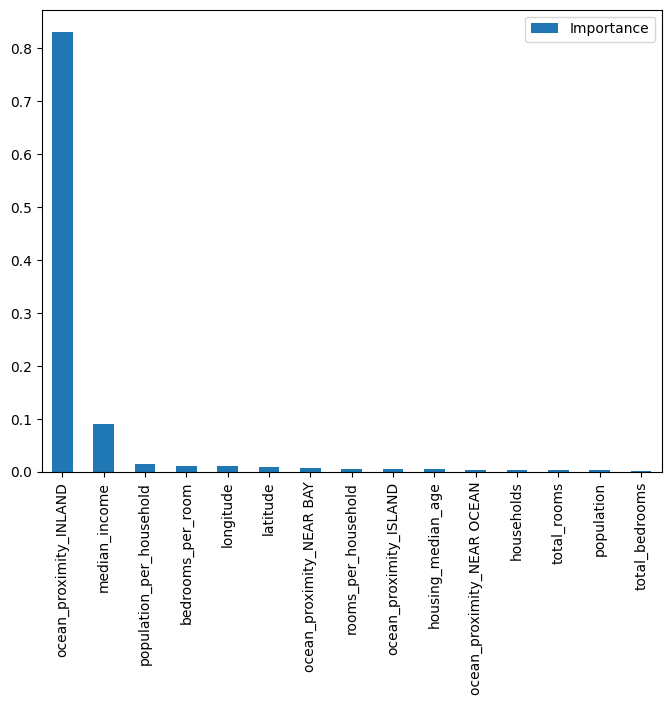

In [17]:
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["Importance"])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize= (8, 6))

In [18]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = np.expm1(model.predict(X_train))
    y_test_pred = np.expm1(model.predict(X_test))
    y_train = np.expm1(y_train)
    y_test = np.expm1(y_test)
    
    metrics = {
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
    }
    print(f"Model: {model}")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

In [19]:
evaluate_model(xgb_random_search.best_estimator_, X_train, y_train, X_test, y_test)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Train MSE: 1555521694.9483
Test MSE: 2238148733.6134
Train MAE: 24963.3700
Test MAE: 30351.8507
Train R²: 0.8825
Test R²: 0.8363


In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,7.629543,6.054708,7.025121,5.984538,1.517119,206864.413155,1.829002,0.192051,1.351496
std,2.003578,2.136348,12.591805,0.750260,0.726728,0.736336,0.726856,0.358647,115435.667099,0.232077,0.045811,0.207805
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.405398,14999.000000,0.613104,0.095310,0.526093
25%,-121.800000,33.930000,18.000000,7.280008,5.693732,6.669498,5.638355,1.270799,119500.000000,1.694044,0.161632,1.232278
50%,-118.490000,34.260000,29.000000,7.662938,6.077642,7.062192,6.016157,1.512156,179700.000000,1.829500,0.184953,1.339617
75%,-118.010000,37.720000,37.000000,8.053251,6.473891,7.451822,6.405228,1.748156,264700.000000,1.953365,0.214967,1.454306
max,-114.310000,41.950000,52.000000,10.579514,8.771215,10.482430,8.713253,2.772595,500001.000000,4.962209,0.693147,7.126355


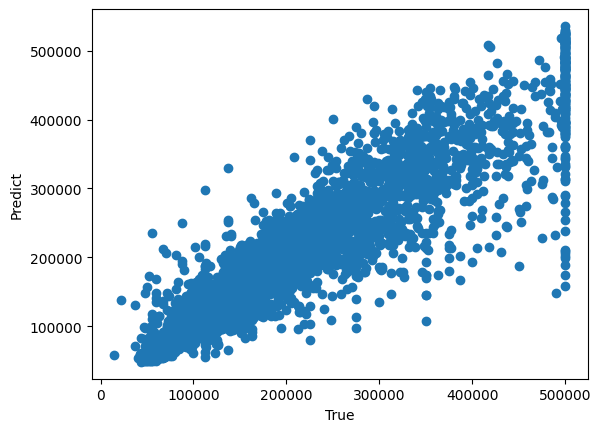

In [21]:
plt.scatter(np.expm1(y_test), y_pred_xgb)
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

In [22]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14278,0.329815,-0.387863,-0.473684,-1.026745,-0.572230,-1.018619,-0.619259,-0.169550,-1.019333,1.296186,-0.986093,0.0,0.0,0.0,1.0
16224,-0.738786,0.989446,-1.421053,1.424831,1.205857,1.339515,1.106689,0.398537,0.811781,-0.455366,0.717123,1.0,0.0,0.0,0.0
7646,0.092348,-0.089710,0.105263,0.726501,0.861734,0.875010,0.874918,-0.149666,-0.371902,0.392655,0.081904,0.0,0.0,0.0,0.0
1402,-0.944591,0.970976,0.052632,-0.676731,-0.581452,-0.638799,-0.799975,-0.321002,0.280773,0.245926,0.429007,0.0,0.0,1.0,0.0
1328,-0.897098,0.984169,-1.315789,0.026468,0.404980,-0.291545,0.155707,0.245934,-0.337028,1.087161,-1.065973,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8204,0.089710,-0.131926,0.368421,0.407858,0.755378,0.018486,0.787504,0.028437,-0.931876,1.001909,-1.765745,0.0,0.0,0.0,1.0
6206,0.142480,-0.060686,0.210526,-0.228758,-0.126585,0.336123,-0.109421,-0.093295,-0.316795,0.277464,1.246290,0.0,0.0,0.0,0.0
2974,-0.142480,0.279683,-0.894737,0.318379,0.297729,0.133032,0.319915,-0.509258,-0.017426,-0.021804,-0.424526,1.0,0.0,0.0,0.0
13314,0.282322,-0.047493,-0.052632,0.101082,-0.047923,0.150677,0.106820,-0.024198,-0.031437,-0.329960,0.159222,1.0,0.0,0.0,0.0


In [26]:
X_train.iloc[[14278]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16955,-0.963061,0.849604,0.368421,-0.729054,-0.781357,-0.220625,-0.698313,0.205427,-0.105407,-0.126984,1.308506,0.0,0.0,1.0,0.0


# Saving the model

In [23]:
import pickle

# Lưu model vào file
with open("best_xgb_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

In [24]:
import joblib

# Lưu scaler lại để dùng sau
joblib.dump(scaler, 'robust_scaler.pkl')

['robust_scaler.pkl']